## TEXT MINING 

In [1]:
import pandas as pd
import numpy as np
import glob
import jieba 

In [2]:
from wordcloud import WordCloud 

In [3]:
filenames = glob.glob(r'C:\Users\wenjuan wang\Desktop\附件2-Dictionary\Macro_News' + "/*.xlsx")

In [4]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_excel(filename))
    
D_frame = pd.concat(dfs,ignore_index=True)

In [5]:
D_frame.head()

,Unnamed: 0,datetime,content,title,channels,content_chinese,words,words_clean
0,0,2019-01-13 20:41:00,私募排排网数据中心最新统计，2018年全年，采用股票策略、固定收益策略、管理期货策略、宏观策...,2018年管理期货策略私募基金表现最佳 平均收益7.63%,NaN,NaN,NaN,NaN
1,1,2019-01-13 20:12:00,海南省政府与腾讯集团在三亚举行工作座谈，三亚市政府与腾讯集团签署战略合作协议。双方将在打造“...,腾讯将在三亚设立区域总部,NaN,NaN,NaN,NaN
2,2,2019-01-13 20:07:00,1月13日晚间公告集锦：九有股份1月15日起实施其他风险警示；新疆交建：不存在未披露的重大事...,1月13日晚间公告集锦：深深房A自1月14日起继续停牌,NaN,NaN,NaN,NaN
3,3,2019-01-13 19:38:00,山西省国资委企业改革处处长高春毅指出，山西省三年关闭退出煤矿数量省属57座，全省88座，省属...,山西国资委官员：煤炭去产能债务问题未同步解决 建议国家...,NaN,NaN,NaN,NaN
4,4,2019-01-13 19:25:00,人社部部长张纪南表示，将实施高校毕业生就业创业计划，基层成长计划和青年就业启航计划等专项计划...,人社部：研究企业降低社保费率的实施方案,NaN,NaN,NaN,NaN


In [6]:
D_frame.shape

(223063, 8)

In [7]:
df_Stock = pd.read_excel(r"C:\Users\wenjuan wang\Desktop\附件2-Dictionary\Stock_News\Multi_Web_20190803_Craw.xlsx")

In [8]:
df_Stock.head()

,Unnamed: 0,Unnamed: 0.1,desc,href,title,url,date,keyword,st_time,end_time,source,article
0,1,0,2002年10月9日 - 山东国际电源表现也弱于港股大盘。 【财经论坛】【短信推荐】【关闭窗...,http://www.baidu.com/link?url=Jiu3Lx1xx51hi5q2...,内地电力股香港股市受挫_滚动新闻_财经纵横_新浪网,finance.sina.com.cn/ro...,2002年10月9日,港股,2002-12-06,2003-01-05,finance.sina.com.cn,近日 在香港上市的内地电力股普遍大跌 拖累国企股指数本月以来下跌 跌幅大于恒生指数 在香港...
1,2,0,"2002年11月25日 - 2002年11月19日,青岛健特生物投资股份有限公司(股票代码:...",http://www.baidu.com/link?url=sBew5Cf3YRXE7wFp...,网易财经频道-史玉柱高价卖掉脑白金,money.163.com/editor/0...,2002年11月25日,股票,2002-12-06,2003-01-05,money.163.com,NaN
2,3,1,2002年12月11日 - 股票并上市后一年内不转让本人所持股份公司的全部股票。本公司亦承诺...,http://www.baidu.com/link?url=UkQe85JXQxVukymS...,腾达建设集团股份有限公司首次公开发行股票上市公告书,quotes.money.163.com/f...,2002年12月11日,股票,2002-12-06,2003-01-05,money.163.com,关闭窗口
3,4,2,2002年11月27日 - 本公司首次公开发行股票前股东所持股份的流通限制及期限:根据国家有...,http://www.baidu.com/link?url=RPrhLj7AhZoqL-qZ...,国药股份(600511)首次公开发行股票上市公告书,quotes.money.163.com/f...,2002年11月27日,股票,2002-12-06,2003-01-05,money.163.com,关闭窗口
4,5,0,"2002年11月15日 - 引言:这次我们选出了中国股市之中""最烂""的20只股票,我们看到过...",http://www.baidu.com/link?url=7NoOuk6hZKRb9biX...,20只最烂股票排行榜(上)_滚动新闻_财经纵横_新浪网,finance.sina.com.cn/ro...,2002年11月15日,股票,2002-12-06,2003-01-05,finance.sina.com.cn,情报 明新文化 撰文 刘晖 世纪星源 深原野 代码 话说 建立之初的深圳证券市场 只有 只...


In [9]:
df_Stock.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'href', 'url', 'keyword','st_time','end_time','source'], axis=1, inplace=True)

In [10]:
df_Stock.dropna(inplace=True)

In [11]:
df_Stock.head()

,desc,title,date,article
0,2002年10月9日 - 山东国际电源表现也弱于港股大盘。 【财经论坛】【短信推荐】【关闭窗...,内地电力股香港股市受挫_滚动新闻_财经纵横_新浪网,2002年10月9日,近日 在香港上市的内地电力股普遍大跌 拖累国企股指数本月以来下跌 跌幅大于恒生指数 在香港...
2,2002年12月11日 - 股票并上市后一年内不转让本人所持股份公司的全部股票。本公司亦承诺...,腾达建设集团股份有限公司首次公开发行股票上市公告书,2002年12月11日,关闭窗口
3,2002年11月27日 - 本公司首次公开发行股票前股东所持股份的流通限制及期限:根据国家有...,国药股份(600511)首次公开发行股票上市公告书,2002年11月27日,关闭窗口
4,"2002年11月15日 - 引言:这次我们选出了中国股市之中""最烂""的20只股票,我们看到过...",20只最烂股票排行榜(上)_滚动新闻_财经纵横_新浪网,2002年11月15日,情报 明新文化 撰文 刘晖 世纪星源 深原野 代码 话说 建立之初的深圳证券市场 只有 只...
5,"2002年11月26日 - 1997年6月,红光实业隐瞒巨额亏损,骗取股票上市;1998年,...",“红光案”:今日和解_经济半小时_财经纵横_新浪网,2002年11月26日,今天上午 我国内地首例证券民事赔偿案 红光案 在成都中级人民法院审理 这起民事赔偿案早在 ...


In [12]:
df_Stock.shape

(23149, 4)

In [13]:
df_Stock.rename(columns={'article':'content'}, inplace=True)

In [14]:
df_Stock.head()

,desc,title,date,content
0,2002年10月9日 - 山东国际电源表现也弱于港股大盘。 【财经论坛】【短信推荐】【关闭窗...,内地电力股香港股市受挫_滚动新闻_财经纵横_新浪网,2002年10月9日,近日 在香港上市的内地电力股普遍大跌 拖累国企股指数本月以来下跌 跌幅大于恒生指数 在香港...
2,2002年12月11日 - 股票并上市后一年内不转让本人所持股份公司的全部股票。本公司亦承诺...,腾达建设集团股份有限公司首次公开发行股票上市公告书,2002年12月11日,关闭窗口
3,2002年11月27日 - 本公司首次公开发行股票前股东所持股份的流通限制及期限:根据国家有...,国药股份(600511)首次公开发行股票上市公告书,2002年11月27日,关闭窗口
4,"2002年11月15日 - 引言:这次我们选出了中国股市之中""最烂""的20只股票,我们看到过...",20只最烂股票排行榜(上)_滚动新闻_财经纵横_新浪网,2002年11月15日,情报 明新文化 撰文 刘晖 世纪星源 深原野 代码 话说 建立之初的深圳证券市场 只有 只...
5,"2002年11月26日 - 1997年6月,红光实业隐瞒巨额亏损,骗取股票上市;1998年,...",“红光案”:今日和解_经济半小时_财经纵横_新浪网,2002年11月26日,今天上午 我国内地首例证券民事赔偿案 红光案 在成都中级人民法院审理 这起民事赔偿案早在 ...


## Merge DataFrame

In [15]:
df_content = pd.concat([D_frame['content'].astype(str),df_Stock['content'].astype(str)])

In [16]:
df_content[1000]

1000    从青岛市城阳区公证处获悉，接青岛市国土资源和房屋管理局高新区分局通知，暂停执行《青岛市高新区...
1000     上市以来 向上市公司股东共募集资金 亿元 派现 亿元 公司全称 丽江玉龙旅游股份有限公司 ...
Name: content, dtype: object

## split world

In [17]:
content = df_content.to_list()

In [23]:
content_S = []

for line in content :
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment)

In [24]:
content_S[1000]

['从',
 '青岛市',
 '城阳区',
 '公证处',
 '获悉',
 '，',
 '接',
 '青岛市',
 '国土资源',
 '和',
 '房屋',
 '管理局',
 '高新区',
 '分局',
 '通知',
 '，',
 '暂停',
 '执行',
 '《',
 '青岛市',
 '高新区',
 '商品房',
 '公证',
 '摇号',
 '售房',
 '规则',
 '》',
 '。']

In [25]:
df_con = pd.DataFrame({'content_S': content_S})
df_con.head()

,content_S
0,"[私募, 排排, 网, 数据中心, 最新, 统计, ，, 2018, 年, 全年, ，, 采..."
1,"[海南省政府, 与, 腾讯, 集团, 在, 三亚, 举行, 工作, 座谈, ，, 三亚市, ..."
2,"[1, 月, 13, 日, 晚间, 公告, 集锦, ：, 九有, 股份, 1, 月, 15,..."
3,"[山西省, 国资委, 企业, 改革, 处处长, 高春毅, 指出, ，, 山西省, 三年, 关..."
4,"[人, 社部, 部长, 张纪南, 表示, ，, 将, 实施, 高校, 毕业生, 就业, 创业..."


## remove stop world

In [27]:
stopwords = pd.read_csv(r"C:\Users\wenjuan wang\Desktop\cn_stopwords.txt", index_col=False, sep="\t", quoting=3,names=['stopword'], encoding='utf-8')

In [28]:
CON = df_con.content_S.values.tolist()

In [29]:
STOP = stopwords.stopword.values.tolist()

In [31]:
def drop_stopwords(CON, STOP):
    content_clean = []
    all_words = []
    for line in CON:
        line_clean = []
        for word in line:
            if word in STOP:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        content_clean.append(line_clean)
    return content_clean,all_words    

CON_clean, Allwords = drop_stopwords(CON,STOP)

In [32]:
df_CON = pd.DataFrame({"content_clean":CON_clean})

In [33]:
df_words = pd.DataFrame({"allWords":Allwords})

## count frequency of words

In [34]:
df_W = df_words['allWords'].value_counts().rename_axis('word').reset_index(name='counts')

In [36]:
df_W.head()

,word,counts
0,,5195329
1,市场,155504
2,\n,102292
3,投资,100812
4,证券,99971


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [38]:
wordcloud = WordCloud(font_path="simhei.ttf",background_color="black", max_font_size=80)
word_dic = {x[0]:x[1] for x in df_W.head(100).values}

In [39]:
wc = wordcloud.fit_words(word_dic)

<function matplotlib.pyplot.show(*args, **kw)>

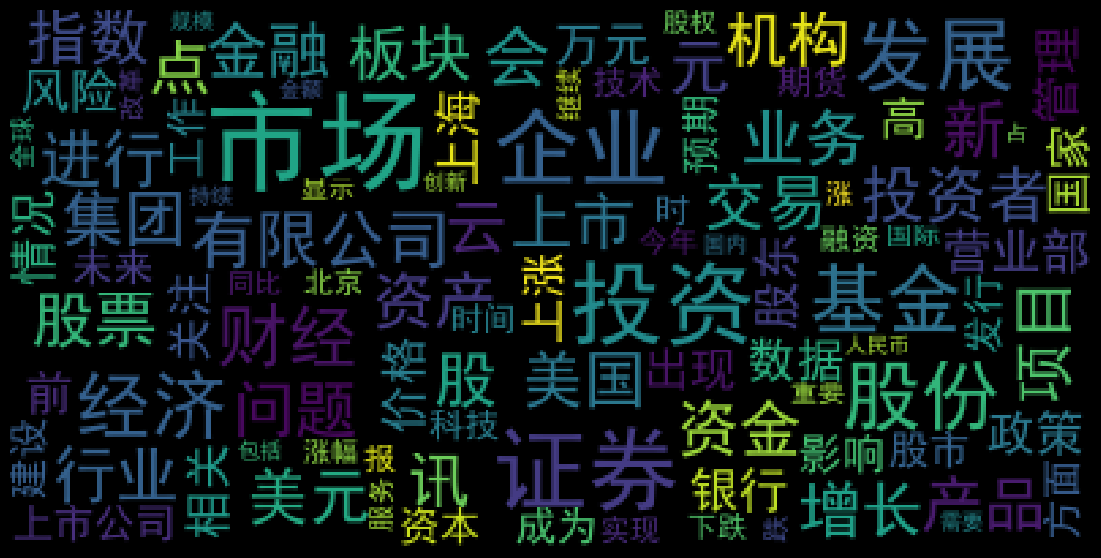

In [44]:
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show

"""

Df_TF = []
import jieba.analyse


for i in range(len(content_S)):
    #print(df_content[index])
    content_S_str = " ".join(content_S[i])
    Df_TF.append((" ".join(jieba.analyse.extract_tags(content_S_str, topK=20, withWeight=False))))
    
Df_TF[0].split()
words = []
for i in range(len(Df_TF)):
    words.append(Df_TF[i].split())
words_all = []

for line in words:
    for word in line :
        words_all.append(word)   
        
words_all
df_wo = pd.DataFrame({"wordAll":words_all})
df_Wo = df_wo['wordAll'].value_counts().rename_axis('word').reset_index(name='counts')df_Wo.head()
wordcloud = WordCloud(font_path="simhei.ttf",background_color="black", max_font_size=80)
word_dictory = {x[0]:x[1] for x in df_Wo.head(200).values}
wc = wordcloud.fit_words(word_dictory)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show

"""